# Task 1 
#### (CodSoft)

### 1. Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.

# Methodology
1. Exploratory Data Analysis (EDA):

    - First, let's load the dataset and look at its structure and summary statistics.
    - We will visualize the distributions of numeric variables and explore relationships between variables, especially with respect to survival.
2. Handling Missing Values:

    - We will identify missing values in each column and decide on appropriate strategies to handle them. For example, we might impute missing values for 'Age' using mean or median, drop 'Cabin' due to too many missing values, and handle missing values in 'Embarked' appropriately.
3. Cleaning the Data:

    - We will perform necessary data cleaning steps such as encoding categorical variables, dropping irrelevant columns, and transforming features if needed.
4. Model Building for Prediction:

    - We will split the data into training and testing sets.
    - We will train various machine learning models such as Logistic Regression, Random Forest, and Gradient Boosting using the training data.
    - We will evaluate the performance of each model using appropriate metrics such as accuracy, precision, recall, and F1-score.
    - We will select the best-performing model and interpret the results.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(titanic_data.duplicated().sum())
print(titanic_data.isnull().sum())
print(titanic_data.columns)

0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Handling Missing values

In [6]:
# Age: Fill missing values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Embarked: Fill missing values with the most common value
most_common_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(most_common_embarked, inplace=True)

# Cabin: Drop the 'Cabin' column due to too many missing values
titanic_data.drop(columns=['Cabin'], inplace=True)

# Check if there are any remaining missing values
print(titanic_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [7]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Droping unwanted columns

In [8]:
# Drop unwanted columns
unwanted_columns = ['PassengerId', 'Name', 'Ticket']
titanic_data.drop(columns=unwanted_columns, inplace=True)

# Display the first few rows of the dataset after dropping columns
print(titanic_data.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


## Exploratory Data Analysis

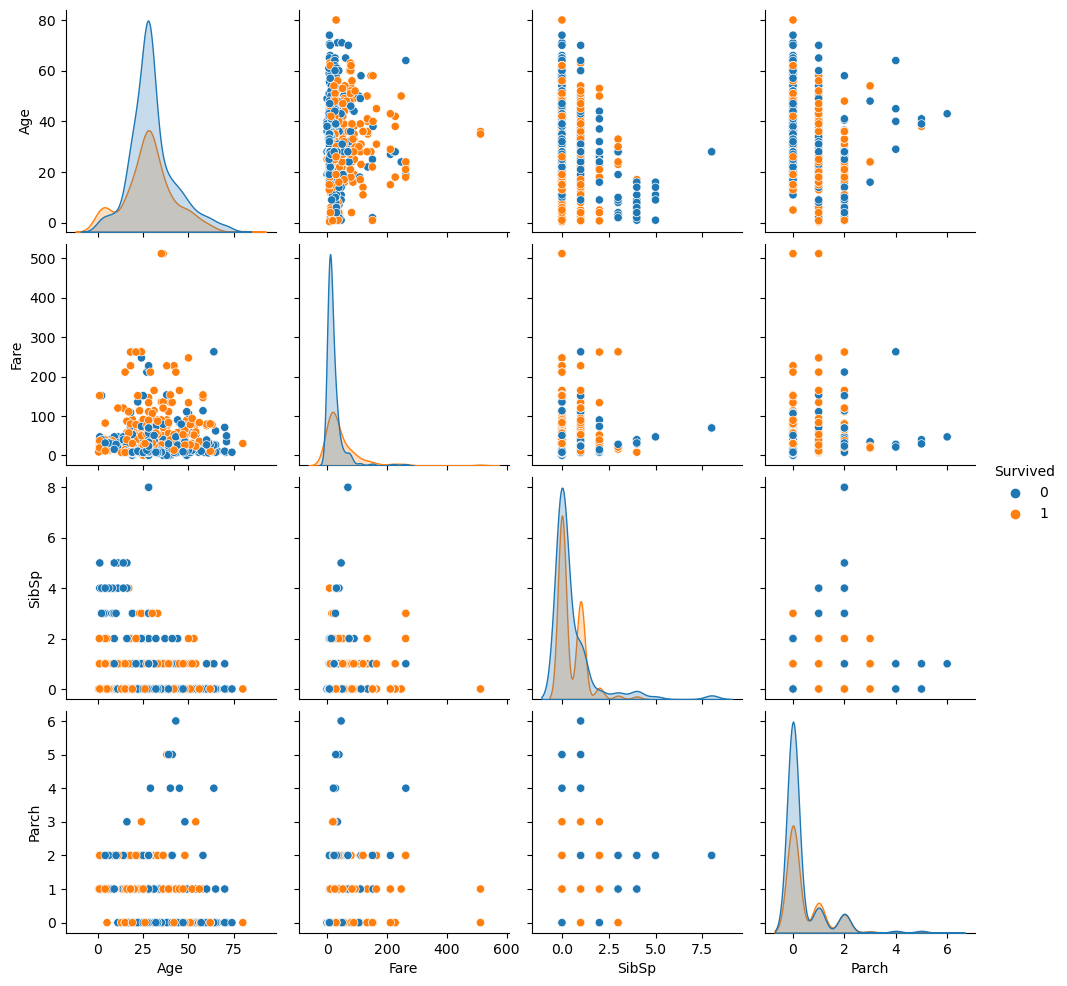

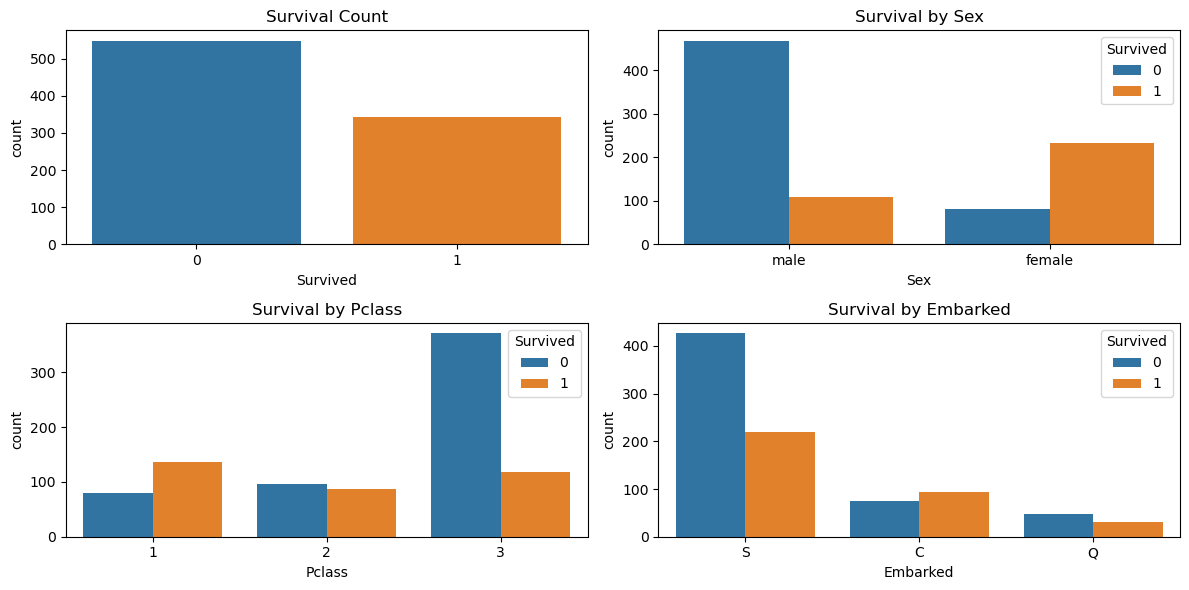

In [9]:
# Visualize distributions of numeric variables
sns.pairplot(titanic_data, hue='Survived', vars=['Age', 'Fare', 'SibSp', 'Parch'])
plt.show()

# Visualize survival rate by categorical variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')

plt.subplot(2, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival by Sex')

plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival by Pclass')

plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', hue='Survived', data=titanic_data)
plt.title('Survival by Embarked')
plt.tight_layout()
plt.show()

# Interpretation:
 - From pairplots, it seems that younger passengers had higher chances of survival.
 - Survival rate was higher for passengers with higher fares.
 - Passengers with fewer siblings/spouses (SibSp) and parents/children (Parch) aboard had slightly higher survival rates.
 - Survival rate was significantly higher for females compared to males.
 - Passengers in the 1st class had a higher chance of survival compared to the 2nd and 3rd classes.
 - Passengers embarked from port 'C' had a higher survival rate compared to other ports.

## Checking for outliers 

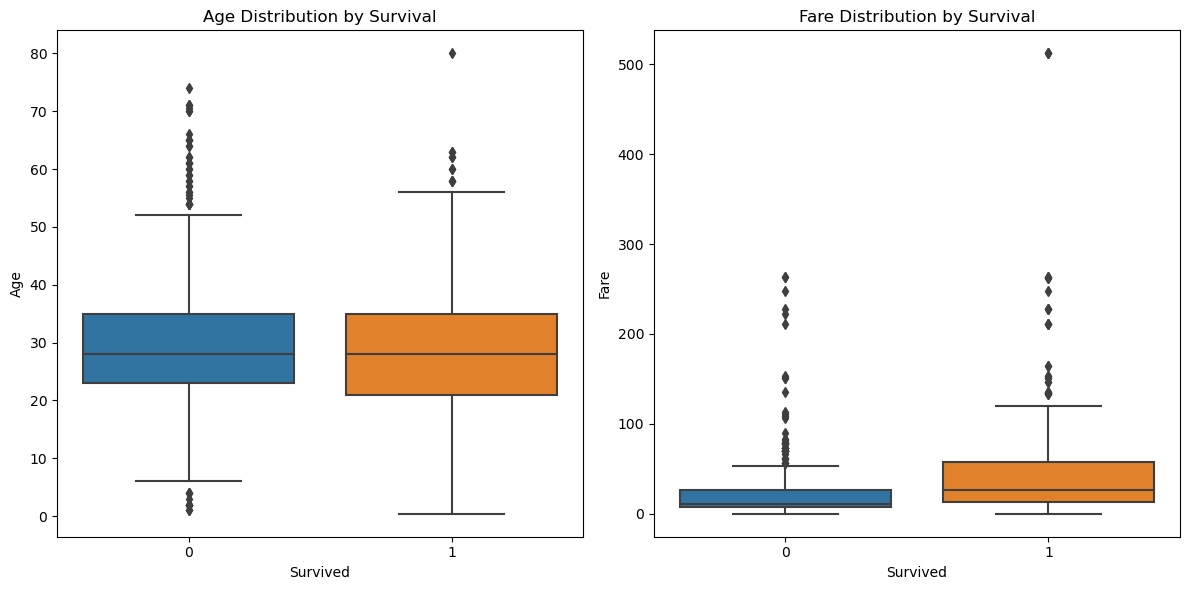

In [10]:
# Create boxplots for 'Age' and 'Fare' variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Age Distribution by Survival')

plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

#### Handling outliers depends on the specific context of the data and the goals of your analysis. Here are a few common strategies to deal with outliers:

1. Trimming: 
    - Remove outliers from the dataset. This can be done by setting a threshold (e.g., anything beyond 3 standard deviations from the mean) and removing observations that fall outside this range.

2. Winsorization: 
    - Replace outliers with the nearest non-outlier value. For example, you could replace outliers with the 5th or 95th percentile value of the variable.

3. Transformation: 
    - Transform the variable using mathematical functions to reduce the impact of outliers. Common transformations include logarithmic, square root, or Box-Cox transformations.

4. Binning: 
    - Convert the continuous variable into categorical bins. This can help mitigate the impact of outliers by grouping extreme values together.

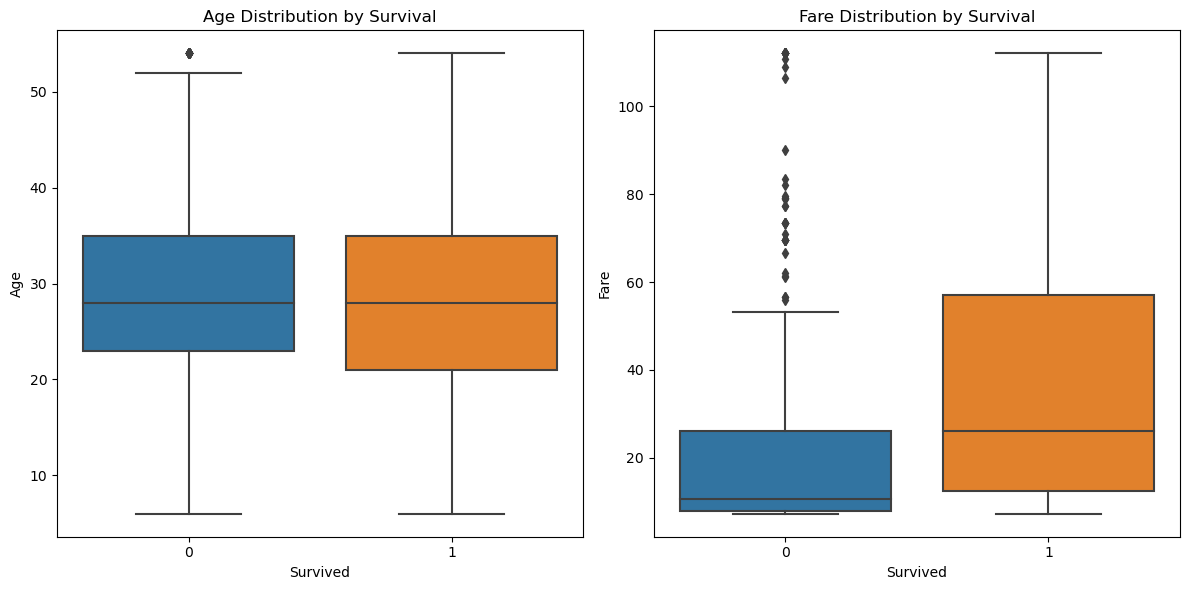

In [11]:
# Winsorization to deal with outliers

# Define the percentile thresholds for Winsorization
pctile_lower = 0.05
pctile_upper = 0.95

# Winsorize 'Age'
age_lower_limit = titanic_data['Age'].quantile(pctile_lower)
age_upper_limit = titanic_data['Age'].quantile(pctile_upper)
titanic_data['Age'] = np.where(titanic_data['Age'] < age_lower_limit, age_lower_limit,
                               np.where(titanic_data['Age'] > age_upper_limit, age_upper_limit, titanic_data['Age']))

# Winsorize 'Fare'
fare_lower_limit = titanic_data['Fare'].quantile(pctile_lower)
fare_upper_limit = titanic_data['Fare'].quantile(pctile_upper)
titanic_data['Fare'] = np.where(titanic_data['Fare'] < fare_lower_limit, fare_lower_limit,
                                np.where(titanic_data['Fare'] > fare_upper_limit, fare_upper_limit, titanic_data['Fare']))

# Create boxplots after Winsorization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Age Distribution by Survival')

plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()


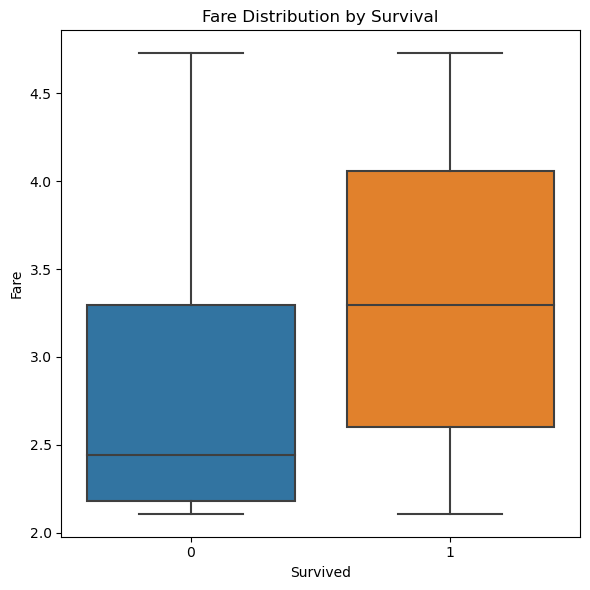

"- This code applies a logarithmic transformation to the 'Fare' variable using the np.log1p() function, \nwhich adds 1 to the 'Fare' values before taking the logarithm to avoid issues with zero or \nnegative values. Then, we create a new boxplot to visualize the transformed distribution\n- This can help reduce the skewness caused by extreme values."

In [12]:
# Apply logarithmic transformation to 'Fare'
titanic_data['Fare'] = np.log1p(titanic_data['Fare'])

# Create boxplot for 'Fare' after transformation
plt.figure(figsize=(6, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

'''- This code applies a logarithmic transformation to the 'Fare' variable using the np.log1p() function, 
which adds 1 to the 'Fare' values before taking the logarithm to avoid issues with zero or 
negative values. Then, we create a new boxplot to visualize the transformed distribution
- This can help reduce the skewness caused by extreme values.'''

# Interpretation:
 - The boxplot now shows the distribution of the transformed 'Fare' variable by survival status. The logarithmic 
 - transformation may help reduce the impact of extreme values and make the distribution more suitable for analysis.

# Model Building for Prediction

In [13]:
# Import LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Sex' column
titanic_data['Sex_encoded'] = label_encoder.fit_transform(titanic_data['Sex'])

# Display the first few rows to verify encoding
print(titanic_data[['Sex', 'Sex_encoded']].head())

      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [14]:
# Again checking for the missing values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Sex_encoded  891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [15]:
titanic_data.head()
titanic_data.drop(columns = ['Sex','Embarked'],inplace = True)

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare features and target variable
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
331,1,45.5,0,0,3.384390,1
733,2,23.0,0,0,2.639057,1
382,3,32.0,0,0,2.188856,1
704,3,26.0,1,0,2.180892,1
813,3,6.0,4,2,3.474293,0
...,...,...,...,...,...,...
106,3,21.0,0,0,2.157559,0
270,1,28.0,0,0,3.465736,1
860,3,41.0,2,0,2.715244,1
435,1,14.0,1,2,4.728088,0


In [18]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [19]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
709,3,28.0,1,1,2.787834,1
439,2,31.0,0,0,2.442347,1
840,3,20.0,0,0,2.188856,1
720,2,6.0,0,1,3.526361,0
39,3,14.0,1,0,2.504848,0
...,...,...,...,...,...,...
433,3,17.0,0,0,2.107178,1
773,3,28.0,0,0,2.107178,1
25,3,38.0,1,5,3.477773,0
84,2,17.0,0,0,2.442347,0


In [20]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# Building Models

### Logistic regression

In [21]:
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8044692737430168

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[90 15]
 [20 54]]


### Random Forest

In [22]:
# Import RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Display classification report and confusion matrix for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))


Random Forest Accuracy: 0.7988826815642458

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Random Forest Confusion Matrix:
[[89 16]
 [20 54]]


### Support Vector Machine

In [23]:
# Import SVM Classifier from scikit-learn
from sklearn.svm import SVC

# Initialize SVM Classifier
svm_model = SVC(random_state=42, probability= True)

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
svm_y_pred = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)

# Display classification report and confusion matrix for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))


SVM Accuracy: 0.6145251396648045

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       105
           1       0.78      0.09      0.17        74

    accuracy                           0.61       179
   macro avg       0.69      0.54      0.46       179
weighted avg       0.68      0.61      0.51       179


SVM Confusion Matrix:
[[103   2]
 [ 67   7]]


### Gradient Boosting

In [24]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Display classification report and confusion matrix for Gradient Boosting
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_y_pred))

print("\nGradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, gb_y_pred))


Gradient Boosting Accuracy: 0.8212290502793296

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Gradient Boosting Confusion Matrix:
[[94 11]
 [21 53]]


### Confusion Matrix

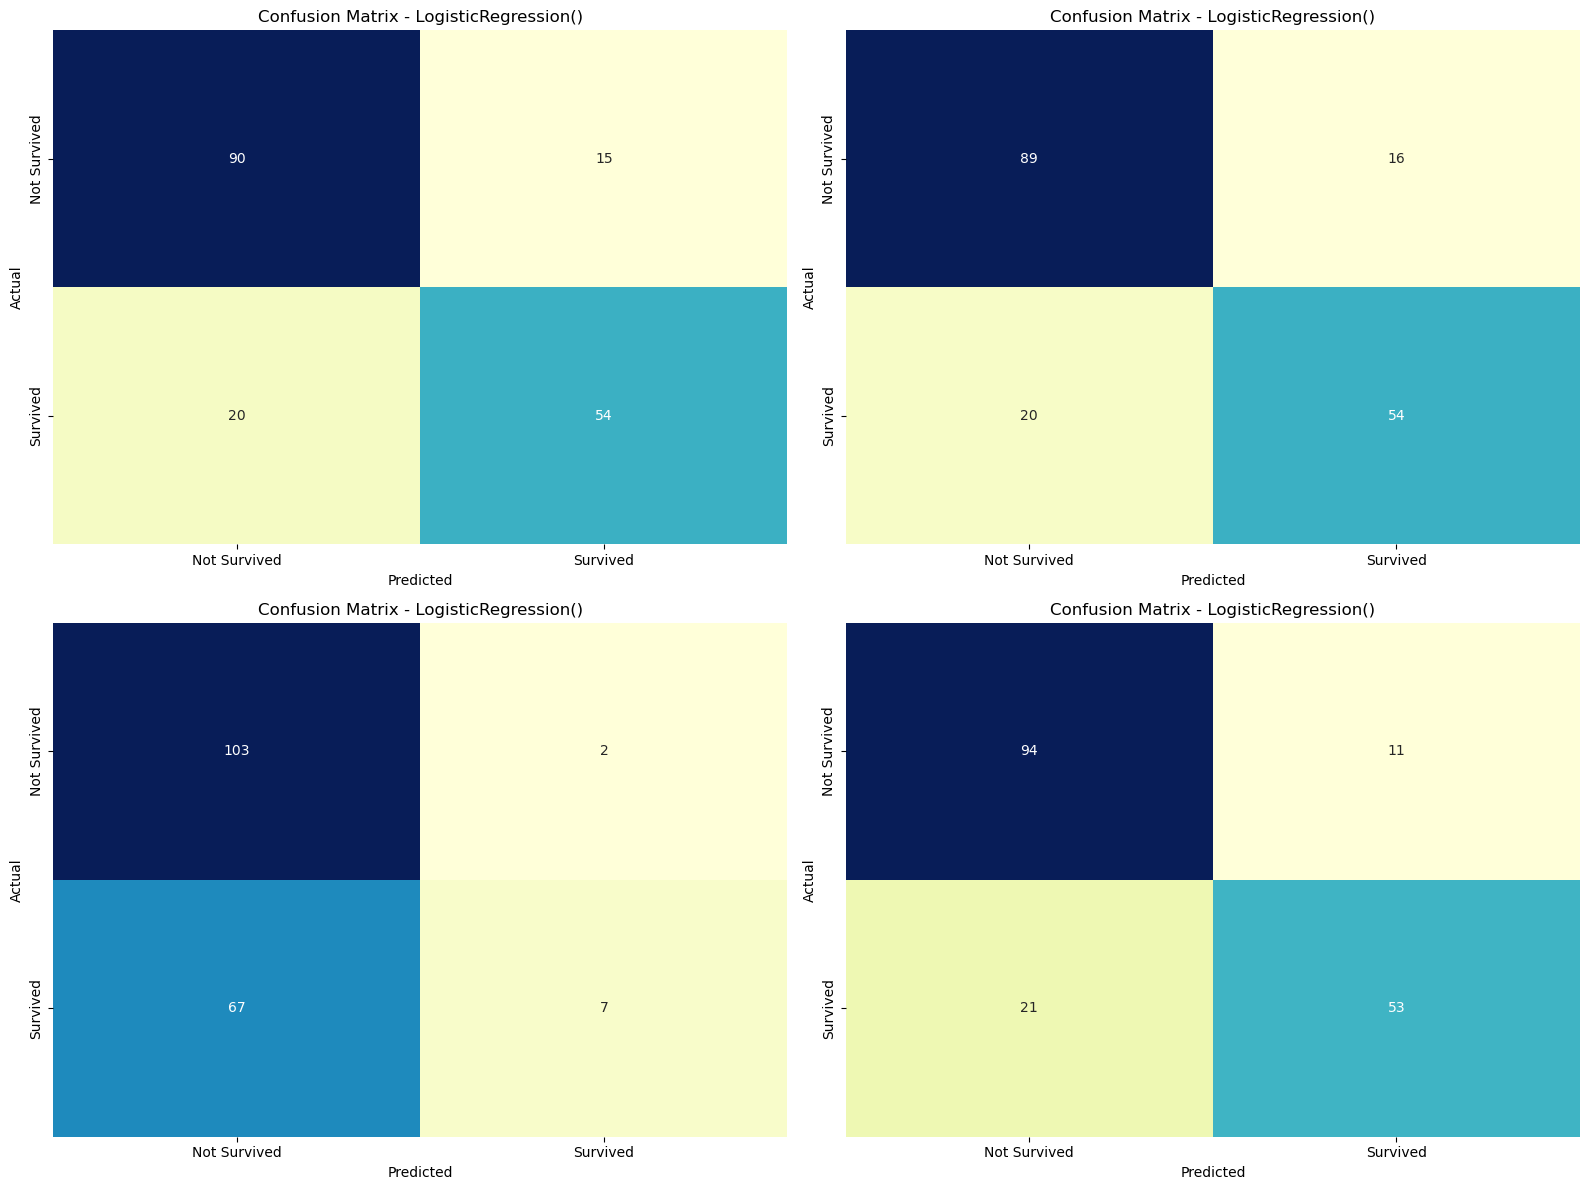

In [25]:
# Import necessary library
import seaborn as sns

# Create confusion matrices
conf_matrices = {
    'Logistic Regression': confusion_matrix(y_test, y_pred),
    'Random Forest': confusion_matrix(y_test, rf_y_pred),
    'Support Vector Machine': confusion_matrix(y_test, svm_y_pred),
    'Gradient Boosting': confusion_matrix(y_test, gb_y_pred)
}

# Plot confusion matrices
plt.figure(figsize=(16, 12))
for i, (models, matrix) in enumerate(conf_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
                xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()


### ROC Curve

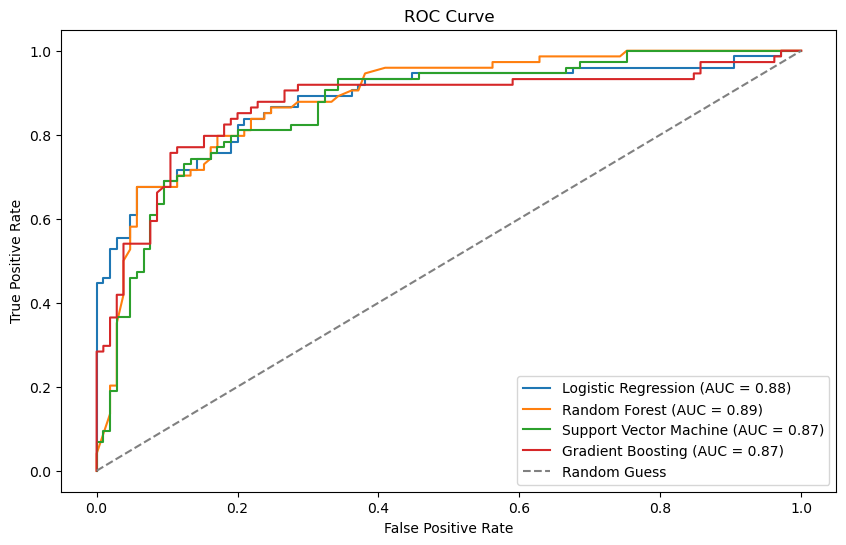

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1])

# Calculate AUC for each model
auc_lr = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
auc_svm = roc_auc_score(y_test, svm_model.decision_function(X_test))
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:,1])

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_svm:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Making prediction for unseen data

In [27]:
new_data_point = np.array([])
for i in X.columns:
    value = float(input("Input value for {} ".format(i)))
    new_data_point = np.append(new_data_point,value)
new_data_point

Input value for Pclass 1
Input value for Age 35
Input value for SibSp 1
Input value for Parch 0
Input value for Fare 4
Input value for Sex_encoded 0


array([ 1., 35.,  1.,  0.,  4.,  0.])

In [28]:
# Reshape the data point to match the shape expected by XGBoost
new_data_point_reshaped = new_data_point.reshape(1, -1)

# Predict the class for the single data point
models = ['model','rf_model','svm_model', 'gb_model']
for model_name in models:
    if model_name == 'model':
        print("The prediction made by the Logistic Regression Model")
        prediction = model.predict(new_data_point_reshaped)
        predicted_probabilities = model.predict_proba(new_data_point_reshaped)
        
    elif  model_name == 'rf_model':
        print("The prediction made by the Random Forest Model built on original data")
        prediction = rf_model.predict(new_data_point_reshaped)
        predicted_probabilities = rf_model.predict_proba(new_data_point_reshaped)
        
    elif  model_name == 'svm_model':
        print("The prediction made by the SVM Model")
        prediction = svm_model.predict(new_data_point_reshaped)
        predicted_probabilities = svm_model.predict_proba(new_data_point_reshaped)
        
    else:
        print("The prediction made by the Gradient Boosting Model")
        prediction = gb_model.predict(new_data_point_reshaped)
        predicted_probabilities = gb_model.predict_proba(new_data_point_reshaped)
    
    print("Predicted Class:", prediction)
    print("Predicted Probabilities:", predicted_probabilities) 
    print(" ")

The prediction made by the Logistic Regression Model
Predicted Class: [1]
Predicted Probabilities: [[0.10486391 0.89513609]]
 
The prediction made by the Random Forest Model built on original data
Predicted Class: [1]
Predicted Probabilities: [[0. 1.]]
 
The prediction made by the SVM Model
Predicted Class: [0]
Predicted Probabilities: [[0.21235276 0.78764724]]
 
The prediction made by the Gradient Boosting Model
Predicted Class: [1]
Predicted Probabilities: [[0.02414007 0.97585993]]
 
